# Covid19 Data in Korea

__13 & 14기 정규세션 10주차 중 첫 주인 1주차 EDA과제입니다.__   

데이터 출처 : kaggle

>기본적으로 데이터 EDA, Visualization을 진행하고 data Pre-Processing, Feature Engineering 의 진행과 10가지 insight를 도출합니다.  
최종적으로 bokeh를 활용한 시각화까지 진행합니다.  

>__Contents__
0. Ready  
1. Load Data  
2. Data EDA & Visualization   
3. Insight & Feature Engineering   
4. Summary  

****

### colab 실행시

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#cd /content/drive/My Drive/Tobigs_HW_Advanced/week1

## Ready  
style ref : https://codedragon.tistory.com/10062

In [3]:
# ready
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use(['fivethirtyeight'])
#plt.style.use(['dark_background'])
plt.style.use('Solarize_Light2')

# Pandas 출력 최대치 설정, 열24개, 행 20개
pd.set_option('max_columns', 25,'max_rows', 25) 
%matplotlib inline

# 한글폰트 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic' 

## 1. Load Data
EDA assignment : Assignment_data.csv

### 데이터 설명 참고  

Assignment_data : 설명이 제곧내
  
case_id  
province_x : 도시명  
city : 행정구역명    
group : 집단감염    
infection_case : 감염사례  
confirmed : 확진자 수  
latitude_x  
longtitude_x   
elementary_shcool_count  
kindergarten_count  
university_count  
academy_ratio  
elderly_population_ratio : 노인인구 비율  
elderly_alone_ratio : 독거노인 비율  
nursing_home_count : 요양시설 갯수  

## data Dataframe

| 컬럼명 | 내용 | 비고 |
|:--------|:--------|:--------|
| case_id | 감염사례 id | 필요없음 |
| province_x | 행정구역 | 시,도 |
| city | 지방자치구역 | 구,군... |
| group | 집단감염여부 | 집단감염만 있는 데이터임 |
| infection_case | 감염사례 | 감염 경로 |
| confirmed | 확진자수 | 대구 이상치임 |
| latitude_x | 위도 | 제곧내 |
| longtitude_x | 경도 | 제곧내 |
| elementary_shcool_count | 초등학교 수 |  |
| kindergarten_count | 유치원 수 |  |
| university_count | 대학교 수 |  |
| academy_ratio | 학원 비율 | 뭐가 100인지 모름 |
| elderly_population_ratio | 노인인구 비율 |  |
| elderly_alone_ratio | 독거노인 비율 |  |
| nursing_home_count | 요양원 수 |  |


In [59]:
data = pd.read_csv('Assignment_data.csv')
data.head(3)

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909
2,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121,22,33,1,0.89,15.12,4.9,909


In [60]:
# case_id 버림
data = data.iloc[:,1:]

In [61]:
data['group'].unique()      # group에는 true 밖에 없음 -> 버림

array([ True])

In [62]:
data = data[data.columns.difference(['group'])]

In [8]:
data.head()

,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1
2,0.89,Gwanak-gu,30,4.9,15.12,22,Wangsung Church,33,37.481735,126.930121,909,Seoul,1
3,1.00,Guro-gu,95,5.7,16.21,26,Guro-gu Call Center,34,37.508163,126.884387,741,Seoul,3
4,1.00,Guro-gu,41,5.7,16.21,26,Manmin Central Church,34,37.481059,126.894343,741,Seoul,3


In [9]:
# target = confirmed 로 빼놓은 dataframe 만듦
target = data['confirmed']
len(target)

117

In [10]:
# data에서 target 제외 데이터프레임 만들어 놓기
df = data[data.columns.difference(['confirmed'])]
df.head()

,academy_ratio,city,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count
0,0.68,Yongsan-gu,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1
1,0.89,Gwanak-gu,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1
2,0.89,Gwanak-gu,4.9,15.12,22,Wangsung Church,33,37.481735,126.930121,909,Seoul,1
3,1.00,Guro-gu,5.7,16.21,26,Guro-gu Call Center,34,37.508163,126.884387,741,Seoul,3
4,1.00,Guro-gu,5.7,16.21,26,Manmin Central Church,34,37.481059,126.894343,741,Seoul,3


__이 과제에서는 의미없지만, 보통 분석 과정에서는 초반에 데이터에서 타겟을 분리하는 과정을 거쳐줘야함.__  

이제 13개의 컬럼이 있고 총 데이터 갯수 117개, null 없음   
데이터 타입은 dtypes: bool(1), float64(3), int64(4), object(5)  

EDA 및 Visualization 은 target도 있는 데이터프레임 data 사용하겠음  

## 2. Data EDA & Visualization

In [63]:
# null 값과 dtype 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   academy_ratio             117 non-null    float64
 1   city                      117 non-null    object 
 2   confirmed                 117 non-null    int64  
 3   elderly_alone_ratio       117 non-null    float64
 4   elderly_population_ratio  117 non-null    float64
 5   elementary_school_count   117 non-null    int64  
 6   infection_case            117 non-null    object 
 7   kindergarten_count        117 non-null    int64  
 8   latitude_x                117 non-null    object 
 9   longitude_x               117 non-null    object 
 10  nursing_home_count        117 non-null    int64  
 11  province_x                117 non-null    object 
 12  university_count          117 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 12.0+ KB


컬럼 13개 null 없음, 총 117개 데이터  
float64(3), int64(5), object(5)
으로 연속형 변수는 3개, 숫자형은 총 8개임  

In [12]:
# 숫자형 8개에 대한 기술통계 확인
data.describe()

,academy_ratio,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,kindergarten_count,nursing_home_count,university_count
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.623333,179.324786,7.692308,17.026923,27.965812,44.547009,702.427350,1.641026
std,0.851856,819.341523,3.566297,5.479777,19.200813,37.317486,633.461962,2.110979
min,0.360000,0.000000,3.800000,9.080000,4.000000,4.000000,47.000000,0.000000
25%,1.000000,5.000000,5.300000,13.170000,14.000000,17.000000,323.000000,0.000000
50%,1.430000,10.000000,6.700000,16.180000,23.000000,35.000000,593.000000,1.000000
75%,1.910000,39.000000,9.000000,20.290000,33.000000,58.000000,765.000000,3.000000
max,4.180000,4511.000000,21.000000,36.550000,110.000000,195.000000,3088.000000,10.000000


In [13]:
# 행정구역 object 출력
print('행정구역 갯수',len(data['province_x'].unique()))
data['province_x'].unique()

행정구역 갯수 13


array(['Seoul', 'Busan', 'Daegu', 'Daejeon', 'Gwangju', 'Sejong',
       'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
       'Chungcheongnam-do', 'Jeollanam-do', 'Gyeongsangbuk-do',
       'Gyeongsangnam-do'], dtype=object)

In [14]:
# 지방자치구역 object 출력
print('지방자치구역 갯수',len(data['city'].unique()))
data['city'].unique()

지방자치구역 갯수 44


array(['Yongsan-gu', 'Gwanak-gu', 'Guro-gu', 'Yangcheon-gu', 'Dobong-gu',
       'Dongdaemun-gu', 'Eunpyeong-gu', 'Seongdong-gu', 'Jongno-gu',
       'Gangnam-gu', 'Jung-gu', 'Seodaemun-gu', 'Geumcheon-gu',
       'Yeongdeungpo-gu', 'Seocho-gu', 'Gangseo-gu', 'Dongnae-gu',
       'Suyeong-gu', 'Haeundae-gu', 'Nam-gu', 'Dalseong-gun', 'Seo-gu',
       'Dong-gu', 'Sejong', 'Seongnam-si', 'Bucheon-si', 'Uijeongbu-si',
       'Anyang-si', 'Suwon-si', 'Wonju-si', 'Goesan-gun', 'Cheonan-si',
       'Seosan-si', 'Muan-gun', 'Cheongdo-gun', 'Bonghwa-gun',
       'Gyeongsan-si', 'Chilgok-gun', 'Gumi-si', 'Geochang-gun',
       'Jinju-si', 'Changwon-si', 'Changnyeong-gun', 'Yangsan-si'],
      dtype=object)

총 13도시, 44개 행정구역에서 확진자가 나왔음을 알 수 있다.  
우리나라는 17개의 행정구역, 69(자치구) + 75(자치시) = 144개의 자치구역이 있음

In [15]:
# 확진구역 비율
confirmed_city_ratio = (len(data['city'].unique()) / 144 ) * 100
confirmed_city_ratio

30.555555555555557

In [16]:
data.columns

Index(['academy_ratio', 'city', 'confirmed', 'elderly_alone_ratio',
       'elderly_population_ratio', 'elementary_school_count', 'infection_case',
       'kindergarten_count', 'latitude_x', 'longitude_x', 'nursing_home_count',
       'province_x', 'university_count'],
      dtype='object')

### 연속형 변수 시각화

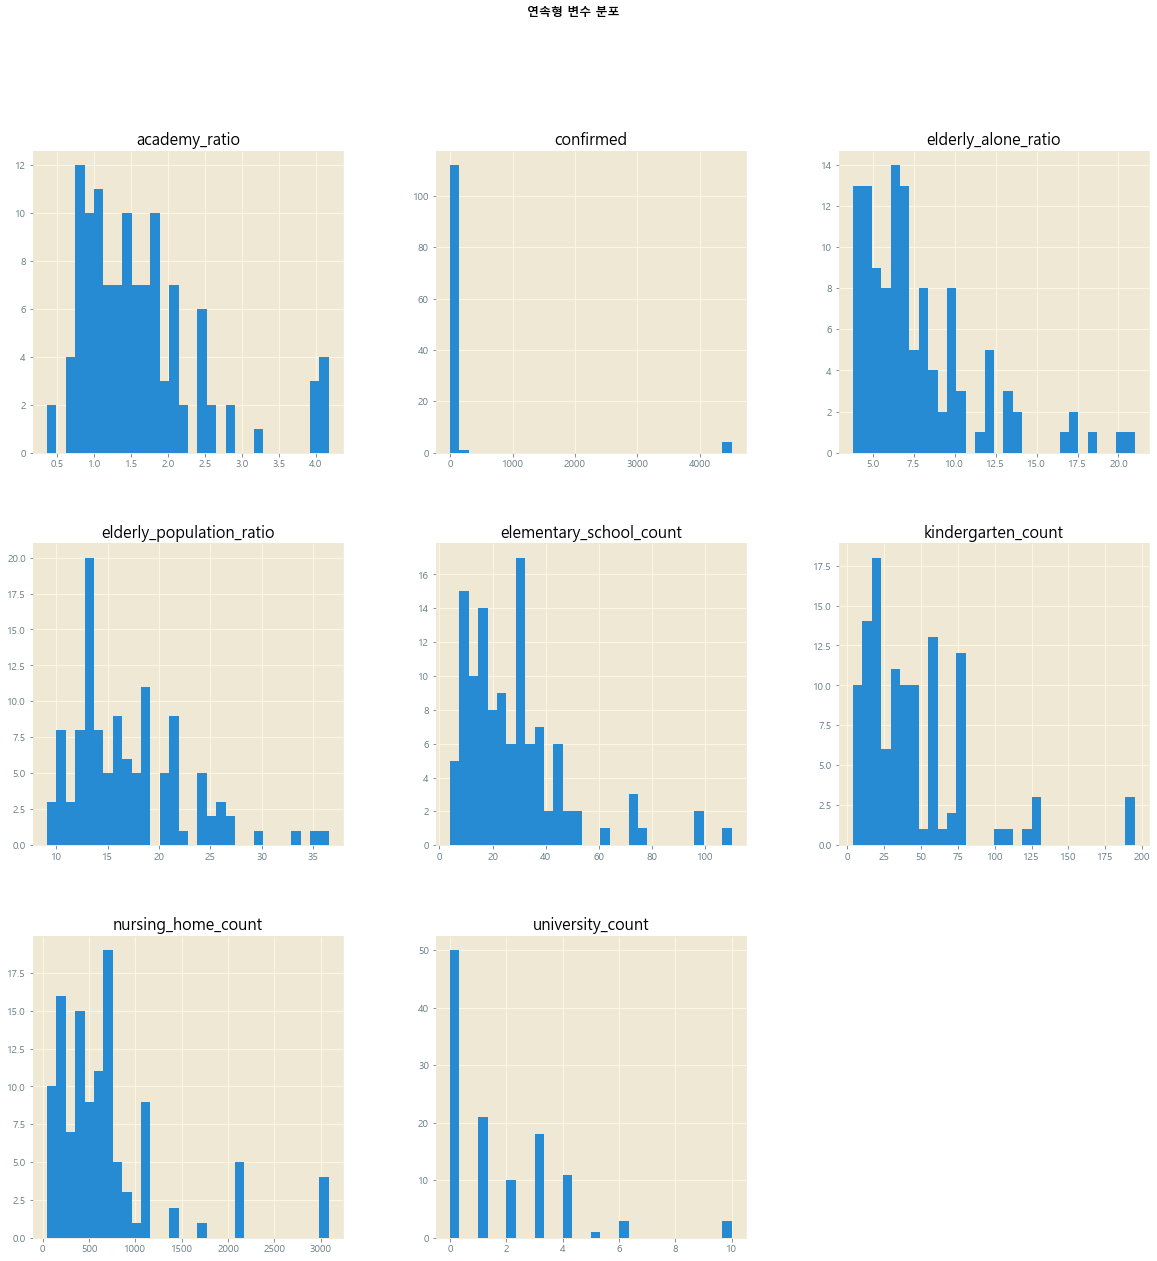

In [17]:
# 모든 연속형 변수의 분포를 histogram으로 확인
g = data.hist(bins=30, figsize=(20,20))
plt.suptitle('연속형 변수 분포', ha = 'center', fontweight=800, fontsize='large')
plt.show()

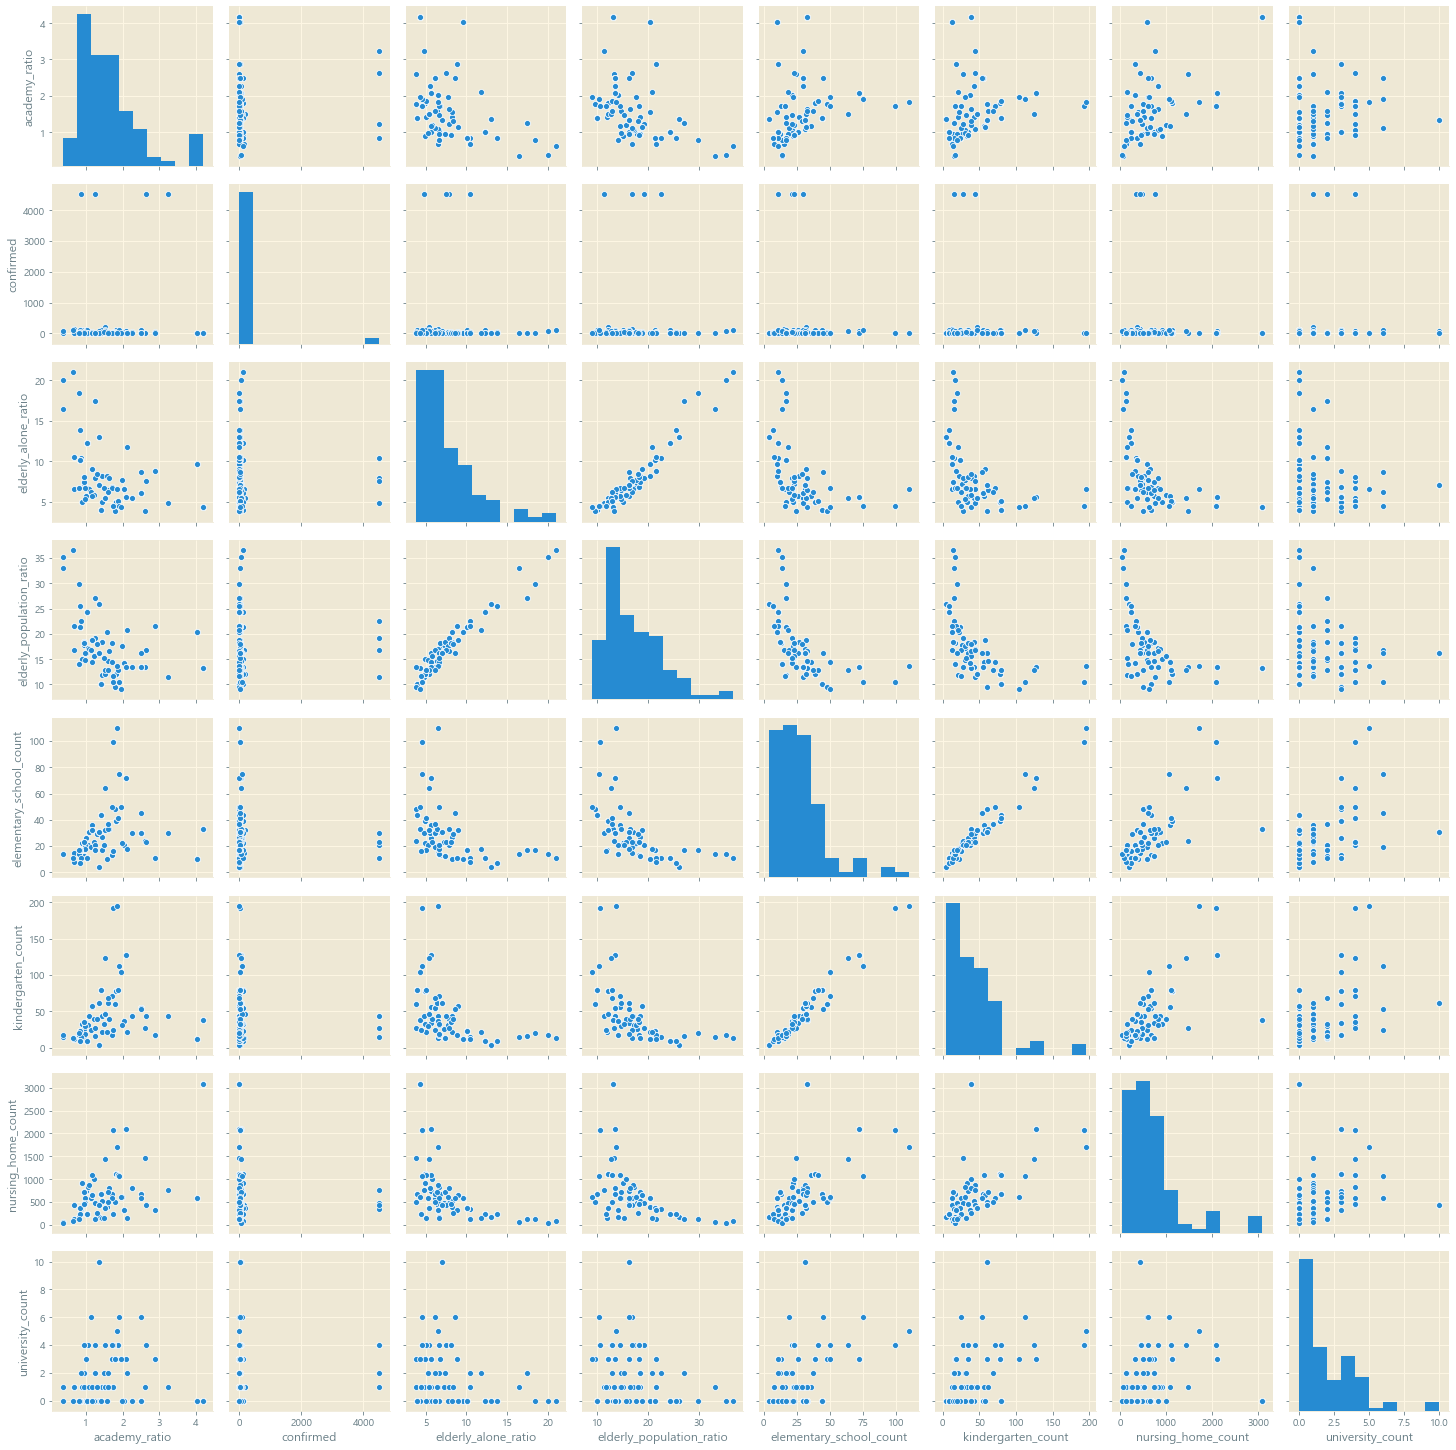

In [18]:
# 전체 데이터 프레임에 대한 연속형변수 시각화 : pairplot
sns.pairplot(data)

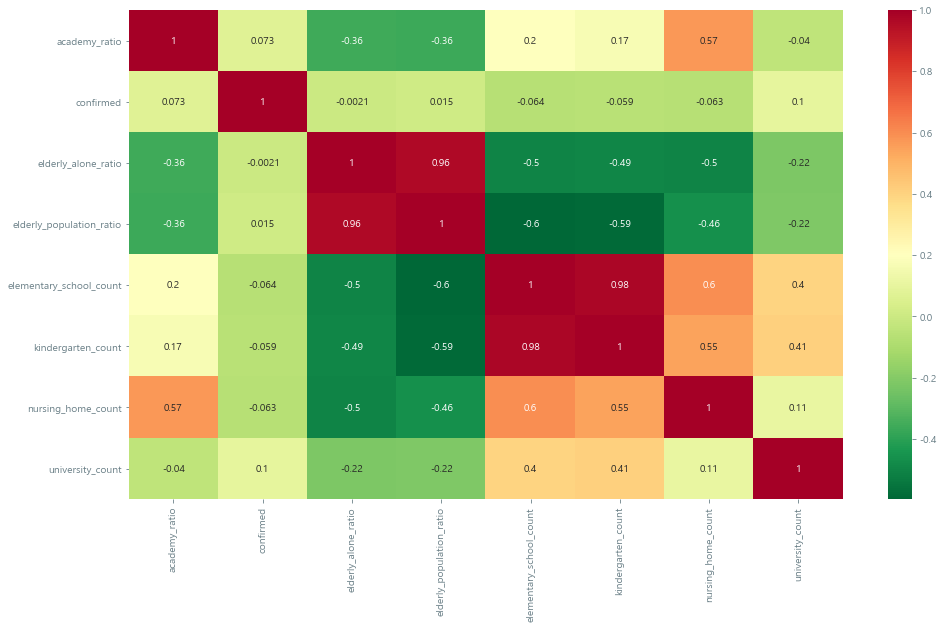

In [19]:
# 모든 연속형 변수 간의 상관관계 확인 - Heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), cmap='RdYlGn_r', annot=True)
plt.show()

target을 corfirmed 로 놨기 때문에 confirmed 행을 보면 대학수와 그나마 높은 것을 볼 수 있다.  
의외였던 것은 요양원 수와 초등학교 수의 상관관계가 높다는 것,  


### 확진자 수 시각화

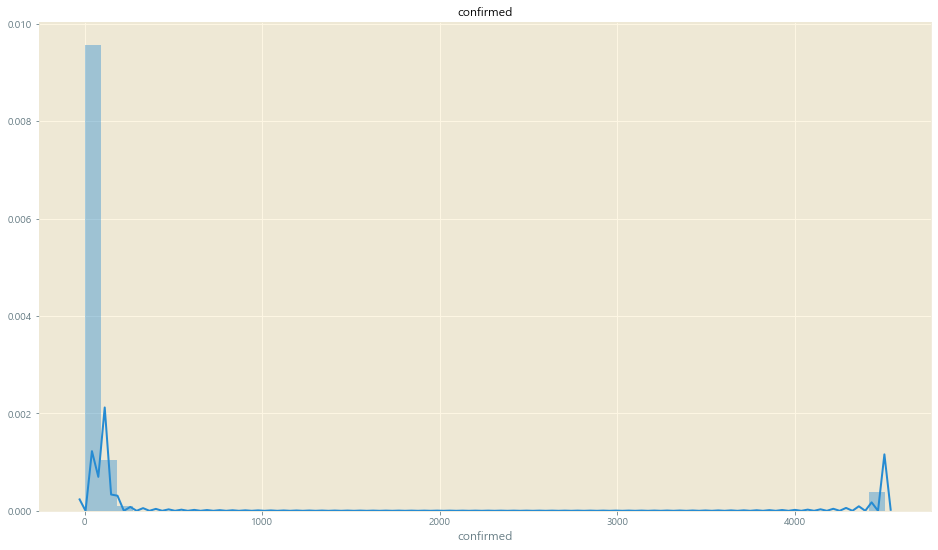

In [20]:
# 확진자 수
plt.figure(figsize=(16,9)) # 0724
plt.title('confirmed',fontsize='large')
sns.distplot(data['confirmed'])
plt.show()

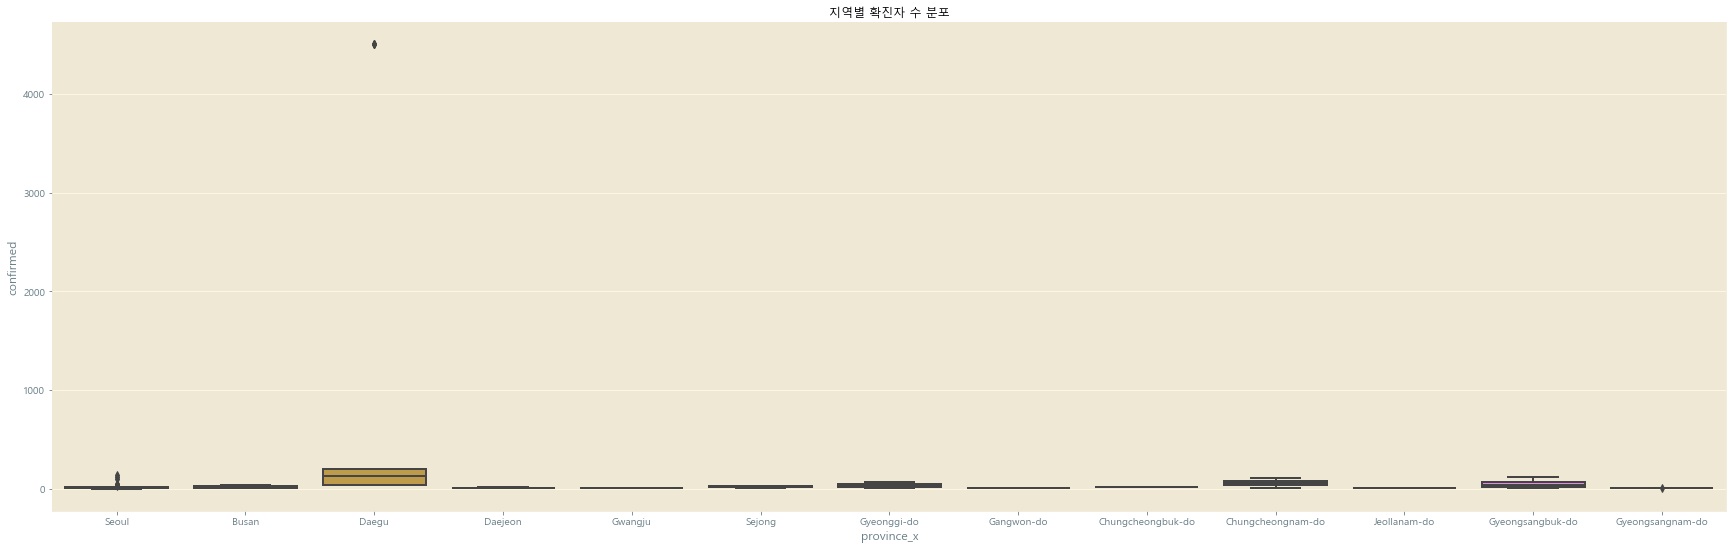

In [21]:
# 지역별 확진자 수 분포
plt.figure(figsize=(30,9))
sns.boxplot(x = data.province_x, y='confirmed', data=data)
plt.title('지역별 확진자 수 분포',fontsize='large')
plt.show()

confirmed 컬럼에 이상치가 있는 것을 볼 수 있는데 대구 발생률인 듯  
boxplot 확인 후 1000 아래인 것만 보자.  
200명 이상의 확진자를 가진 데이터를 빼고 processed_data 데이터 프레임을 만들었다.  
confirmed data관련해서는 processed_data를 사용하겠다.  


Text(0.5, 0.98, '이상치 제거 전 후 확진자 수 분포')

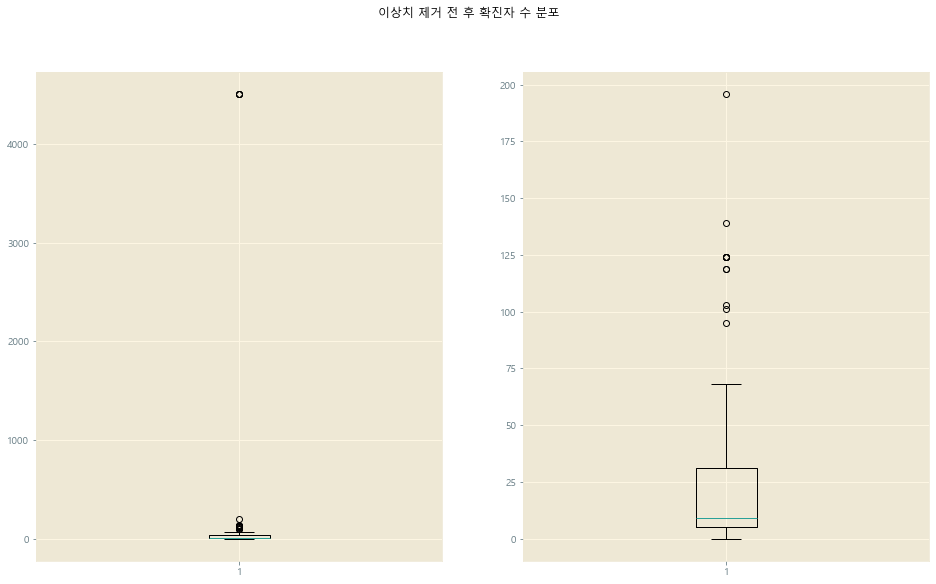

In [64]:
# processed_data
processed_data = data[data['confirmed']<1000]  

# boxplot 2개 그리기 0724
f, ax = plt.subplots(1,2,figsize=(16,9))
# data
ax[0] = plt.subplot(1,2,1)
ax[0] = plt.boxplot(data['confirmed'])
# processed_data 
ax[1] = plt.subplot(1,2,2)    
ax[1] = plt.boxplot(processed_data['confirmed'])

plt.suptitle('이상치 제거 전 후 확진자 수 분포',fontsize='large')

In [65]:
processed_data.columns

Index(['academy_ratio', 'city', 'confirmed', 'elderly_alone_ratio',
       'elderly_population_ratio', 'elementary_school_count', 'infection_case',
       'kindergarten_count', 'latitude_x', 'longitude_x', 'nursing_home_count',
       'province_x', 'university_count'],
      dtype='object')

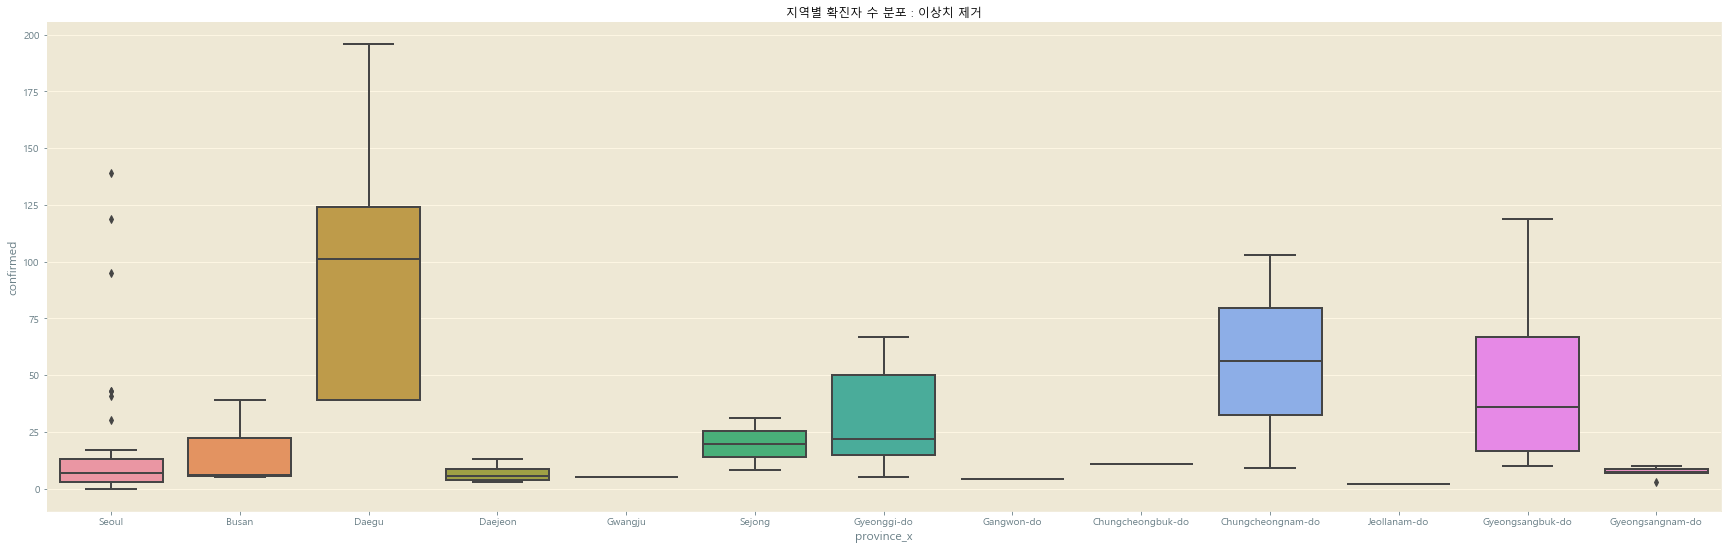

In [23]:
# 지역별 확진자 수 분포 - 이상치 제거
plt.figure(figsize=(30,9))
sns.boxplot(x = processed_data.province_x, y='confirmed', data=processed_data)
plt.title('지역별 확진자 수 분포 : 이상치 제거',fontsize='large')
plt.show()

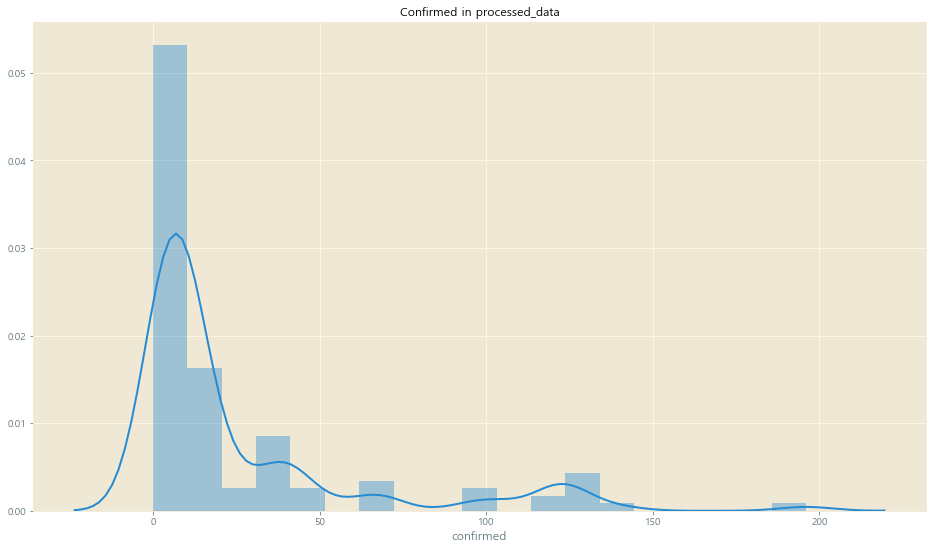

In [24]:
# 확진자 수 분포
plt.figure(figsize=(16,9)) # 0724
plt.title('Confirmed in processed_data',fontsize='large')
sns.distplot(processed_data['confirmed'])
plt.show()

이상치를 제거해도 확진자수 분포는 왼쪽으로 치우쳐져있다. 스케일링된 confirmed_log 변수 생성 - 피쳐생성 #1  
대부분의 집단감염 사례들은 10명에서 20명의 확진자가 나왔고 30명 이상의 확진자가 나온 경우는 드물다.

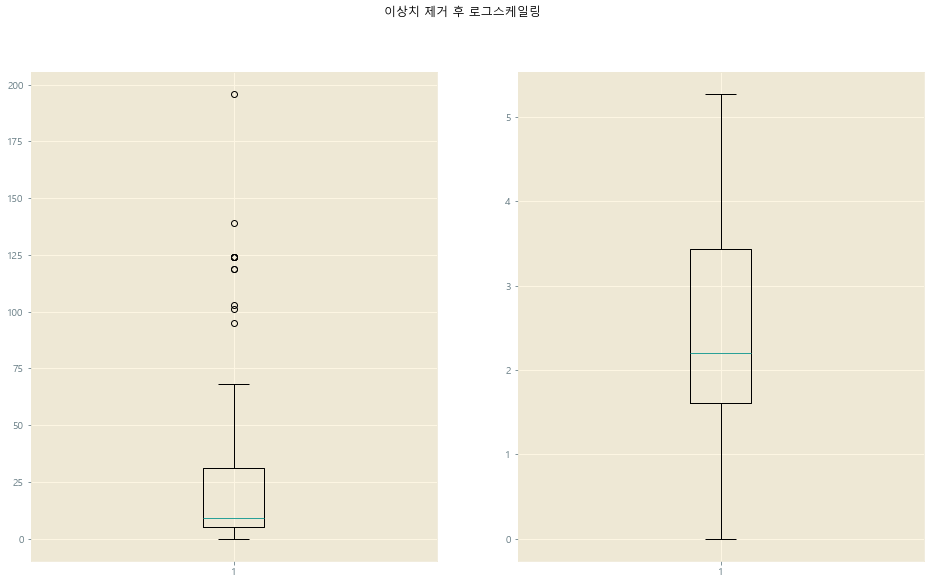

In [25]:
# 확진자수 분포는 왼쪽으로 치우쳐져 있기 때문에 로그스케일링을 적용해서 다시 그려본다.
processed_data['confirmed_log'] = np.log(processed_data['confirmed'])

plt.figure(figsize=(16,9)) # 0724
plt.title('Confirmed_log in processed_data')

# 그냥 confirmed
ax[0] = plt.subplot(1,2,1)
ax[0] = plt.boxplot(processed_data['confirmed'])
# confirmed_log
ax[1] = plt.subplot(1,2,2)
ax[1] = plt.boxplot(processed_data['confirmed_log'])
#sns.kdeplot(processed_data.sort_values('confirmed_log').confirmed_log)
plt.suptitle('이상치 제거 후 로그스케일링',fontsize='large')
plt.show()


아주 스케일링이 잘되었다. 분포도 중심으로 잘 이동했고 예쁘다.

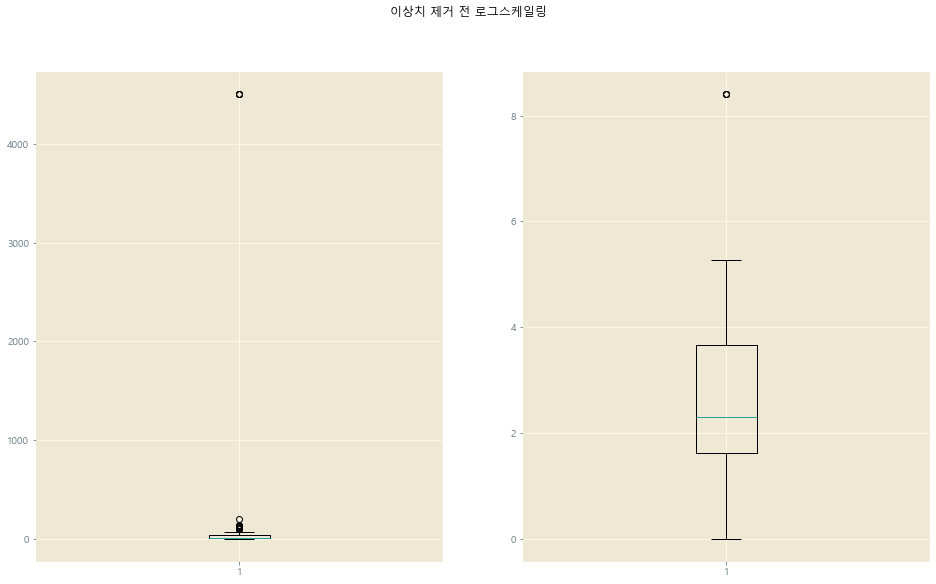

In [26]:
# 확진자수 분포는 왼쪽으로 치우쳐져 있기 때문에 로그스케일링을 적용해서 다시 그려본다.
data['confirmed_log'] = np.log(data['confirmed'])

plt.figure(figsize=(16,9)) # 0724
plt.title('Confirmed_log in Original data')

# 그냥 confirmed
ax[0] = plt.subplot(1,2,1)
ax[0] = plt.boxplot(data['confirmed'])
# confirmed_log
ax[1] = plt.subplot(1,2,2)
ax[1] = plt.boxplot(data['confirmed_log'])
#sns.kdeplot(data.sort_values('confirmed_log').confirmed_log)
plt.suptitle('이상치 제거 전 로그스케일링',fontsize='large')
plt.show()

이상치가 있는 원본데이터에 로그 적용해도 어느정도 스케일링이 되는 모습을 볼 수있다.

In [52]:
processed_data.describe()

,academy_ratio,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,kindergarten_count,nursing_home_count,university_count,confirmed_log,children_facility,capital
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1.610442,25.991150,7.693805,17.011947,28.203540,44.973451,709.486726,1.601770,-inf,73.176991,0.079646
std,0.844192,38.122803,3.609963,5.523844,19.455608,37.836457,642.837642,2.123591,NaN,56.984213,0.271950
min,0.360000,0.000000,3.800000,9.080000,4.000000,4.000000,47.000000,0.000000,-inf,8.000000,0.000000
25%,1.000000,5.000000,5.300000,13.170000,14.000000,17.000000,323.000000,0.000000,1.609438,31.000000,0.000000
50%,1.430000,9.000000,6.700000,16.180000,23.000000,35.000000,594.000000,1.000000,2.197225,58.000000,0.000000
75%,1.860000,31.000000,9.000000,20.290000,33.000000,60.000000,814.000000,3.000000,3.433987,92.000000,0.000000
max,4.180000,196.000000,21.000000,36.550000,110.000000,195.000000,3088.000000,10.000000,5.278115,305.000000,1.000000


In [27]:
region_count = data['province_x'].value_counts()
region_processed_count = processed_data['province_x'].value_counts()
print('-----지역별 집단감염 사례 수-----')
print(region_count)
print('----------------------------------')
print('----이상치 제거 후 지역별 사례 수----')
print(region_processed_count)

-----지역별 집단감염 사례 수-----
Seoul                42
Daejeon              20
Daegu                17
Gyeonggi-do           9
Gyeongsangbuk-do      7
Gyeongsangnam-do      6
Gwangju               6
Busan                 3
Chungcheongnam-do     2
Sejong                2
Chungcheongbuk-do     1
Gangwon-do            1
Jeollanam-do          1
Name: province_x, dtype: int64
----------------------------------
----이상치 제거 후 지역별 사례 수----
Seoul                42
Daejeon              20
Daegu                13
Gyeonggi-do           9
Gyeongsangbuk-do      7
Gyeongsangnam-do      6
Gwangju               6
Busan                 3
Chungcheongnam-do     2
Sejong                2
Chungcheongbuk-do     1
Gangwon-do            1
Jeollanam-do          1
Name: province_x, dtype: int64


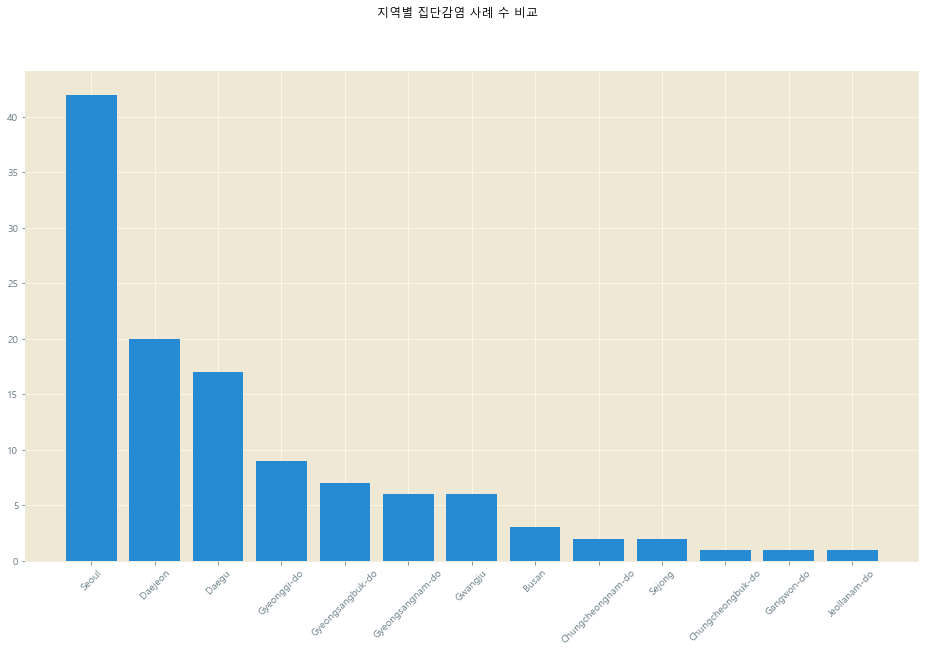

In [28]:
# 케이스별 지역 확진자 수 분포 
# case_id 컬럼이 있는 케이스로 나눠지는 데이터였기 때문
region_count = data['province_x'].value_counts()

# data - 대구 신천지 포함
plt.figure(figsize=(16,9))
plt.bar(region_count.index, region_count)
plt.xticks(rotation=45)
plt.suptitle('지역별 집단감염 사례 수 비교',fontsize='large')
plt.show()

집단감염은 서울의 사례가 가장 많았다. 의외인 것은 2위가 대전이네....언제 이렇게 있었을까  

infection_case : 감염사례라는 재밌는 컬럼이 있다.  
감염 case_id 들의 감염 사례들은 어떤 것으로 이뤄져 있나 보자

In [29]:
# data 에서 진행
# 사례 종류들은 어떤 것일까
print('사례 갯수 : ',len(data['infection_case'].unique()))
data['infection_case'].unique()

사례 갯수 :  67


array(['Itaewon Clubs', 'Richway', 'Wangsung Church',
       'Guro-gu Call Center', 'Manmin Central Church', 'Daezayeon Korea',
       'Yangcheon Table Tennis Club', 'Biblical Language study meeting',
       'Day Care Center', 'Dongan Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Korea Campus Crusade of Christ',
       'Samsung Medical Center', 'Gangnam Yeoksam-dong gathering',
       'Gangnam Dongin Church', 'Samsung Fire & Marine Insurance',
       'Jung-gu Fashion Company', 'KB Life Insurance',
       'Seoul City Hall Station safety worker', 'Yeonana News Class',
       'Geumcheon-gu rice milling machine manufacture',
       'Yeongdeungpo Learning Institute', 'Seocho Family',
       'SJ Investment Call Center', 'Onchun Church',
       'Suyeong-gu Kindergarten', 'Haeundae-gu Catholic Church',
       'Shincheonji Church', 'Second Mi-Ju Hospital',
       'Daesil Convalescent Hospital', 'Hansarang Convalescent Hospital',
       '

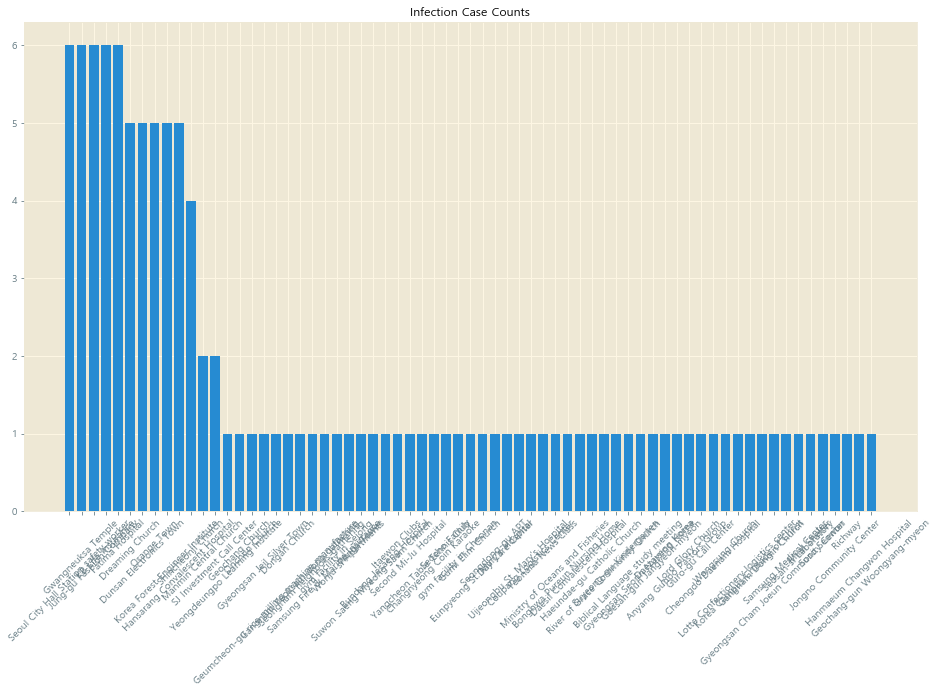

In [30]:
case_count = data['infection_case'].value_counts()
plt.figure(figsize=(16,9))
plt.bar(case_count.index, case_count)
plt.xticks(rotation=45)
plt.title('Infection Case Counts',fontsize='large')
plt.show()

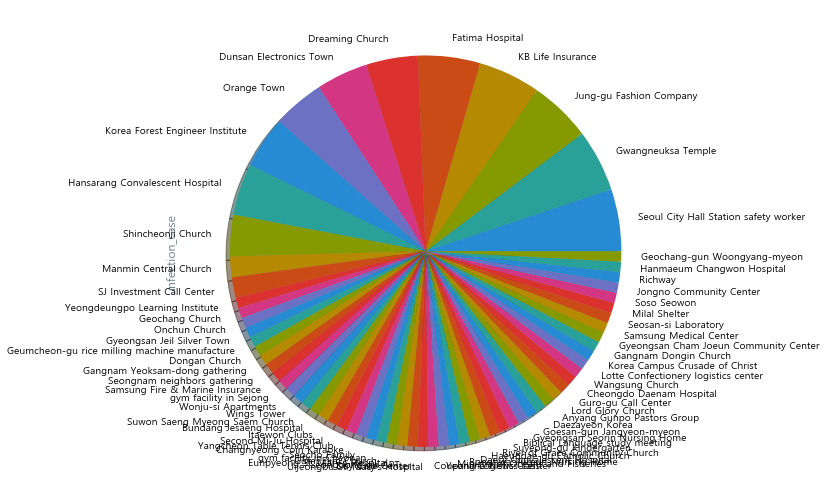

In [31]:
# pie chart
#plt.axis('equal')     # 설정
plt.figure(figsize=(16,9))
case_count.plot.pie(shadow=True)      # 귀찮으니깐 디폴트

데이터가 117개인데 사례가 67개이다 2번이상 발생한 사례는 뭔가 보기나 하자

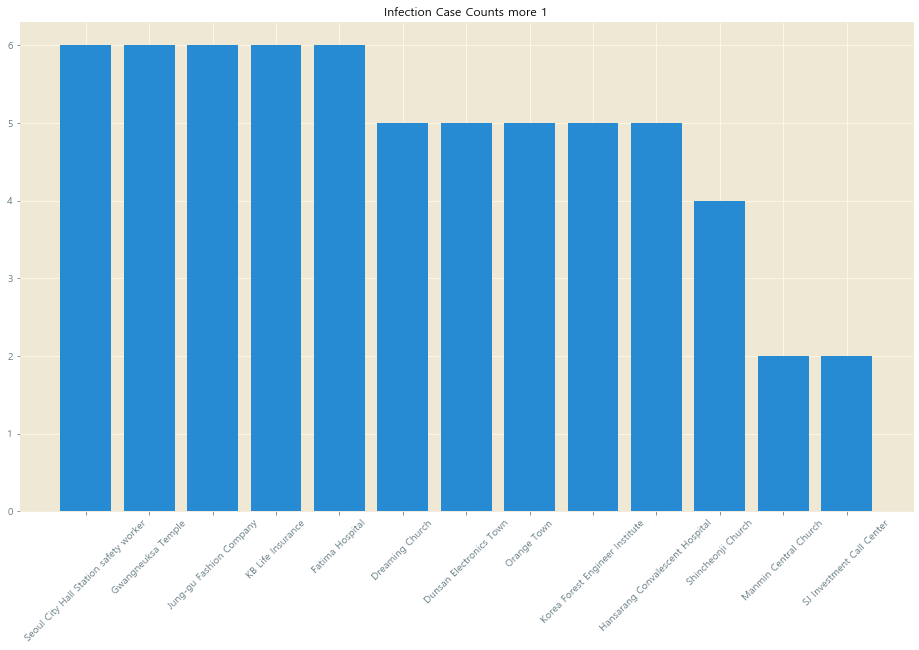

In [32]:
# bar chart
case_many_count = case_count[case_count > 1] 
plt.figure(figsize=(16,9))
plt.bar(case_many_count.index, case_many_count)
plt.xticks(rotation=45)
plt.title('Infection Case Counts more 1',fontsize='large')
plt.show()

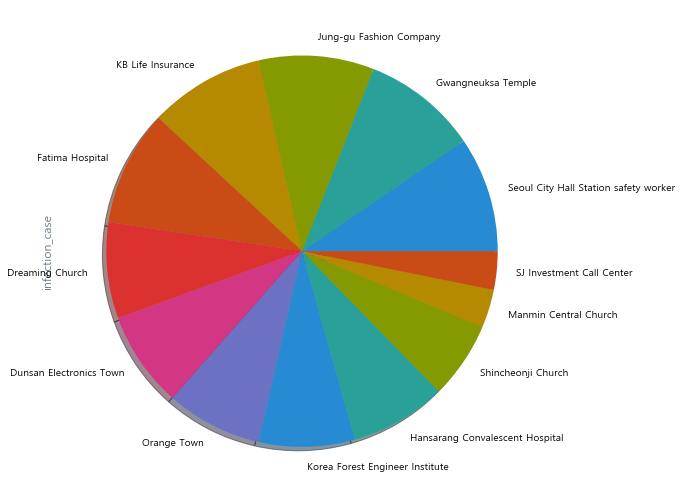

In [33]:
# pie chart
#plt.axis('equal')     # 설정
plt.figure(figsize=(16,9))
case_many_count.plot.pie(shadow=True)      # 귀찮으니깐 디폴트

In [34]:
case_many_count

Seoul City Hall Station safety worker    6
Gwangneuksa Temple                       6
Jung-gu Fashion Company                  6
KB Life Insurance                        6
Fatima Hospital                          6
Dreaming Church                          5
Dunsan Electronics Town                  5
Orange Town                              5
Korea Forest Engineer Institute          5
Hansarang Convalescent Hospital          5
Shincheonji Church                       4
Manmin Central Church                    2
SJ Investment Call Center                2
Name: infection_case, dtype: int64

Fatima Hospital, Seoul City Hall Station safety worker, Gwangneuksa Temple, KB Life Insurance, Jung-gu Fashion Company 가 사례로는 가장 많았다.  
그럼 그냥 확진자를 많이 발생시킨 사례는 얼마나 될까?  

In [35]:
# 확진자 10명이상 집단 감염 사례
confirmed10 = data[data['confirmed'] >= 10]
print('10명 이상 집단 감염사례 : ',confirmed10.shape[0])
confirmed10.head(2)

10명 이상 집단 감염사례 :  59


,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count,confirmed_log
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1,4.934474
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1,4.779123


In [36]:
# 확진자 100명이상 집단 감염 사례
confirmed100 = data[data['confirmed'] >= 100]
print('100명 이상 집단 감염사례 : ',confirmed100.shape[0])
confirmed100.head(10)

100명 이상 집단 감염사례 :  15


,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count,confirmed_log
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1,4.934474
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1,4.779123
45,1.24,Nam-gu,4511,7.9,19.13,21,Shincheonji Church,27,35.84008,128.5667,475,Daegu,4,8.414274
46,0.85,Nam-gu,4511,10.4,22.49,11,Shincheonji Church,15,35.84008,128.5667,345,Daegu,2,8.414274
47,2.63,Nam-gu,4511,7.5,16.76,23,Shincheonji Church,44,35.84008,128.5667,427,Daegu,4,8.414274
48,3.23,Nam-gu,4511,4.8,11.42,30,Shincheonji Church,44,35.84008,128.5667,765,Daegu,1,8.414274
49,1.51,Dalseong-gun,196,5.4,12.11,32,Second Mi-Ju Hospital,47,35.857375,128.466651,361,Daegu,1,5.278115
50,1.51,Dalseong-gun,101,5.4,12.11,32,Daesil Convalescent Hospital,47,35.857393,128.466653,361,Daegu,1,4.615121
51,1.02,Seo-gu,124,12.3,24.36,11,Hansarang Convalescent Hospital,9,35.885592,128.556649,235,Daegu,0,4.820282
52,0.83,Seo-gu,124,10.1,21.29,17,Hansarang Convalescent Hospital,23,35.885592,128.556649,374,Daegu,0,4.820282


In [37]:
# 확진자 200명이상 집단 감염 사례
confirmed200 = data[data['confirmed'] >= 200]
print('200명 이상 집단 감염사례 : ',confirmed200.shape[0])
print('집단 감염 확진자 수 최대 ', max(data.confirmed),'명')
confirmed200.head()

200명 이상 집단 감염사례 :  4
집단 감염 확진자 수 최대  4511 명


,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count,confirmed_log
45,1.24,Nam-gu,4511,7.9,19.13,21,Shincheonji Church,27,35.84008,128.5667,475,Daegu,4,8.414274
46,0.85,Nam-gu,4511,10.4,22.49,11,Shincheonji Church,15,35.84008,128.5667,345,Daegu,2,8.414274
47,2.63,Nam-gu,4511,7.5,16.76,23,Shincheonji Church,44,35.84008,128.5667,427,Daegu,4,8.414274
48,3.23,Nam-gu,4511,4.8,11.42,30,Shincheonji Church,44,35.84008,128.5667,765,Daegu,1,8.414274


위의 4가지 경우가 집단 감염 200명 이상의 사례 4가지이다. 다만 모두 대구 남구 신천지 교회에서 발생한 사례들인데 확진자수가 모두 4511명으로 카운트 되었다.  
동일 사례가 4번 카운트 된 것 같은데 다른 변수는 또 값이 다르다. raw 데이터 파일의 문제인 것 같다.

20세 이하의 아동,청소년들은 얼마나 위험에 노출되었을까? 간접적으로 감염사례의 교육시설의 수로 알아보도록 하자 - 피쳐생성 #2

In [38]:
# children_facility 컬럼 생성, 대학은 제외
data['children_facility'] = data.elementary_school_count + data.kindergarten_count
data.head(2)

,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count,confirmed_log,children_facility
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1,4.934474,28
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1,4.779123,55


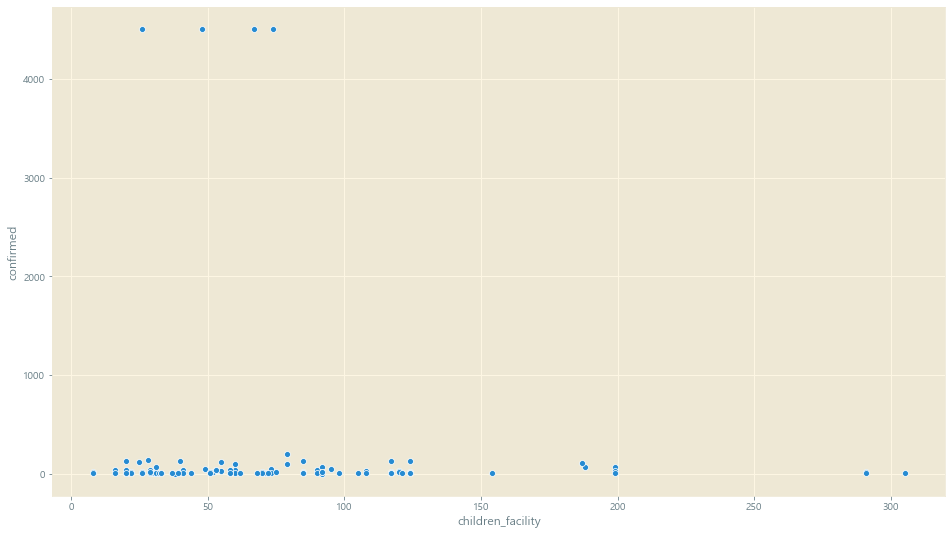

In [39]:
# children_facility 의 수와 확진자 수를 scatter plot 그림
plt.figure(figsize=(16,9))
sns.scatterplot(x=data['children_facility'], y=data['confirmed'])
plt.show()

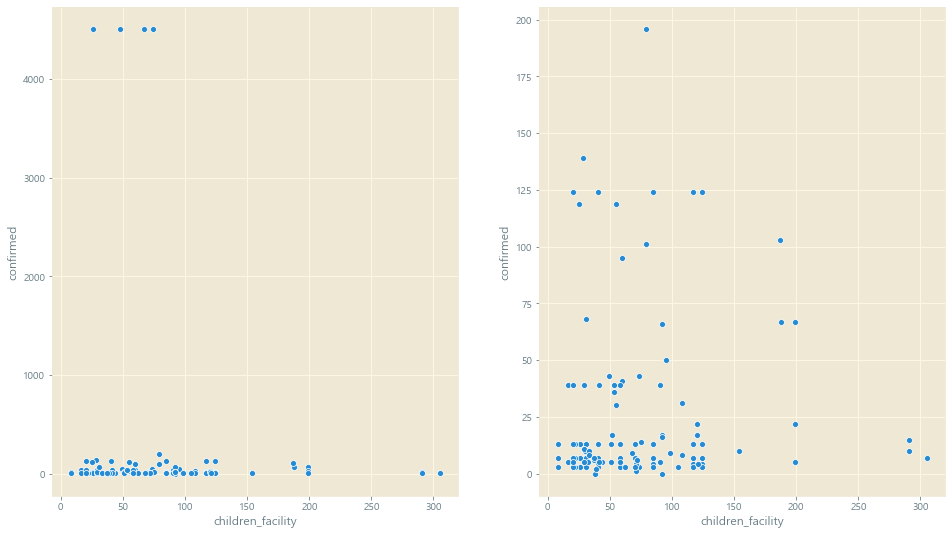

In [40]:
# 이상치 대구때문에 보기가 힘드니깐 processed_data에서도 그려보자
processed_data['children_facility'] = processed_data.elementary_school_count + processed_data.kindergarten_count
# children_facility 의 수와 확진자 수를 scatter plot 그림 비교
plt.show()
# data
plt.figure(figsize=(16,9))
ax[0] = plt.subplot(1,2,1)
ax[0] = sns.scatterplot(x=data['children_facility'], y=data['confirmed'])
# processed_data
ax[1] = plt.subplot(1,2,2)   
ax[1] = sns.scatterplot(x=processed_data['children_facility'], y=processed_data['confirmed'])


사실 딱히 눈에 보이는 인사이트는 없다  
선형관계도 보이지 않는다. 부모들의 통제하에 있어서, 아이들이 몰리는 곳이라고 감염자가 특히 많이 나오는 등의 현상은 발생하지 않았다.  
일단 교육시설 갯수가 100개 이상인 곳이 급격하게 적다.

### 지역별 확진자 수
지역별 확
서울,수도권과 비수도권을 나누는 변수를 만들고 변수 클래스 별로 분포를 그려보자 - 피쳐생성 #3

Capital : Seoul + Gyeonggi-do -> 1  
그 외 나머지 : 0  

참고 : 'df["순위"] = df["순위"].apply(lambda x: 999 if x == "" else 300 if x==1 else x)'


In [41]:
# capital
data['capital'] = 0
#data['capital'] = data['capital'].apply(lambda x: 1 if data.province_x =='Seoul')
data['capital'] = np.where(data['province_x'] == ('Seoul'), 1, 0)
data['capital'] = np.where(data['province_x'] == ('Gyeonggi-do'), 1, 0)
data.head()

,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count,confirmed_log,children_facility,capital
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1,4.934474,28,0
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1,4.779123,55,0
2,0.89,Gwanak-gu,30,4.9,15.12,22,Wangsung Church,33,37.481735,126.930121,909,Seoul,1,3.401197,55,0
3,1.00,Guro-gu,95,5.7,16.21,26,Guro-gu Call Center,34,37.508163,126.884387,741,Seoul,3,4.553877,60,0
4,1.00,Guro-gu,41,5.7,16.21,26,Manmin Central Church,34,37.481059,126.894343,741,Seoul,3,3.713572,60,0


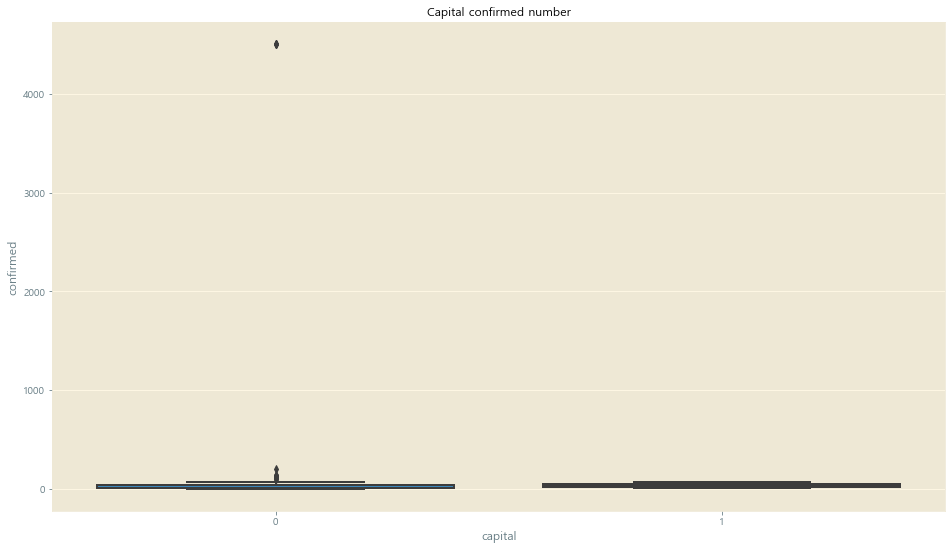

In [42]:
# capital visualization
plt.figure(figsize=(16,9))
sns.boxplot(x = 'capital', y='confirmed', data=data)
plt.title('Capital confirmed number',fontsize='large')
plt.show()

확진자 수에 관련된 것은 모두 대구 때문에 잘 안보인다.  
processed data에서 이상치 제거된 상태에서 나타내보겠다.  

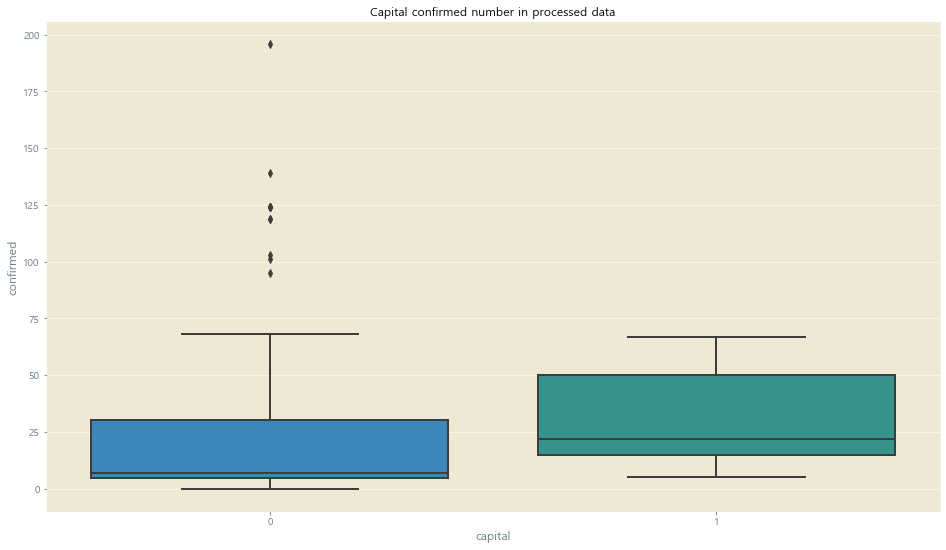

In [43]:
# processed_data 수도권 확진자 수 비교
processed_data['capital'] = 0
processed_data['capital'] = np.where(processed_data['province_x'] == ('Seoul'), 1, 0)
processed_data['capital'] = np.where(processed_data['province_x'] == ('Gyeonggi-do'), 1, 0)
# capital visualization
plt.figure(figsize=(16,9))
sns.boxplot(x = 'capital', y='confirmed', data=processed_data)
plt.title('Capital confirmed number in processed data',fontsize='large')
plt.show()

전체적으로 수도권이 확진자 수가 많지만, 비수도권이 한번 감염자가 발생할 때 화끈하게 발생했나보다, 이상치 처럼 보이는 iqr 밖의 수들이 많다.

### 수도권 집단감염 확진자 수
수도권에서 서울과 경기도 분포를 비교해서 그려보자

In [44]:
capital_seoul = data[data['capital']==1]
capital_ggdo = data[data['province_x'] == ('Gyeonggi-do')]

In [45]:
# capital,Seoul visualization
'''
plt.figure(figsize=(16,9))
plt.title('Seoul and Gyunggi-do confirmed number in processed data')
plt.show()

# Seoul
ax[0] = plt.subplot(1,2,1)
ax[0] = sns.boxplot(x = capital_seoul, y = capital_seoul[''])
# 경기도 ggdo
ax[1] = plt.subplot(1,2,2)   
ax[1] = sns.boxplot(x=processed_data['children_facility'], y=processed_data['confirmed'])
'''


"\nplt.figure(figsize=(16,9))\nplt.title('Seoul and Gyunggi-do confirmed number in processed data')\nplt.show()\n\n# Seoul\nax[0] = plt.subplot(1,2,1)\nax[0] = sns.boxplot(x = capital_seoul, y = capital_seoul[''])\n# 경기도 ggdo\nax[1] = plt.subplot(1,2,2)   \nax[1] = sns.boxplot(x=processed_data['children_facility'], y=processed_data['confirmed'])\n"

In [46]:
data.head(2)

,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count,confirmed_log,children_facility,capital
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1,4.934474,28,0
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1,4.779123,55,0


논외인데, 교육시설 컬럼이 많기 때문에 비교해보자(교육시설 갯수 변수는 빼고),  
다만 academy_ratio는 학원 비율같은데 무엇을 100으로 둔 것인지 모르겠다.  
academy_ratio, elementary_school_count, kindergarten_count, university_count

In [47]:
# 교육시설 비교
education = data.iloc[:,[0,5,7,12]]
education.head(1)

,academy_ratio,elementary_school_count,kindergarten_count,university_count
0,0.68,15,13,1


academy_ratio  elementary_school_count  \
academy_ratio                 1.000000                 0.199893   
elementary_school_count       0.199893                 1.000000   
kindergarten_count            0.165559                 0.975891   
university_count             -0.039981                 0.398693   

                         kindergarten_count  university_count  
academy_ratio                      0.165559         -0.039981  
elementary_school_count            0.975891          0.398693  
kindergarten_count                 1.000000          0.408946  
university_count                   0.408946          1.000000  


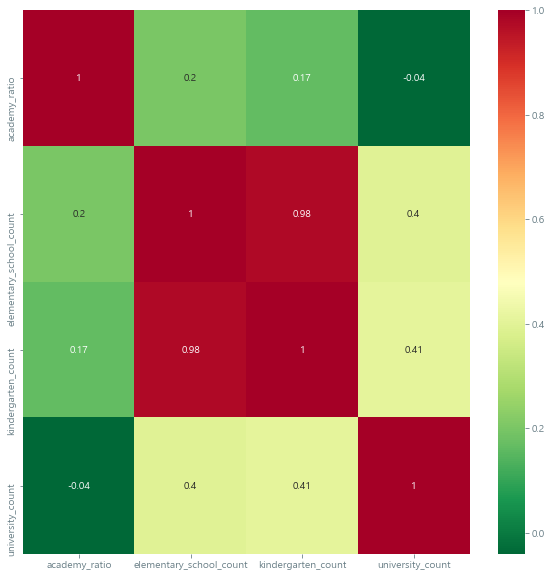

In [48]:
# 교육시설 상관관계 시각화
plt.figure(figsize=(10,10))
sns.heatmap(education.corr(), cmap='RdYlGn_r', annot=True)
print(education.corr())
plt.show()

유치원 있는 곳에 초등학교 있다.... 학원비율이나 대학교 수와는 관련없지만 비슷한 나이대의 아이들이 사는 곳과 교육시설이 몰려있는 것을 알 수있음  
그럼 노인비율이 높은 곳에는 애들이 없을까? 시각화를 한번 해보자, elderly_population_ratio와 아까 만든 피쳐인 children_facility를 사용하겠다.  

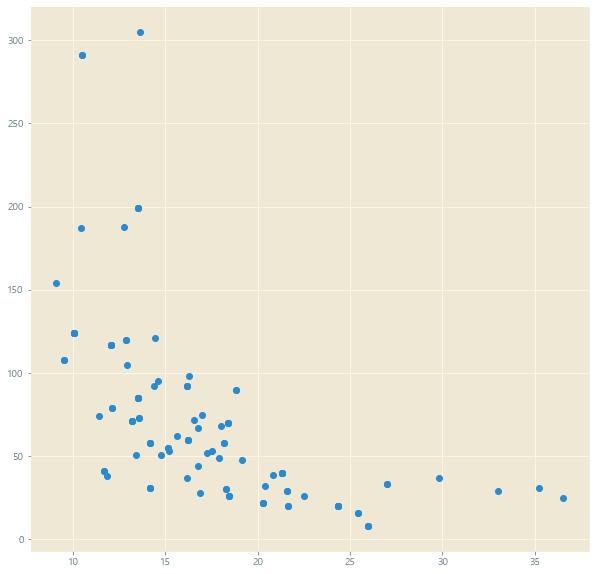

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(x = data.elderly_population_ratio, y = data.children_facility )
#plt.show()

children_facility  elderly_population_ratio
children_facility                  1.000000                 -0.595444
elderly_population_ratio          -0.595444                  1.000000


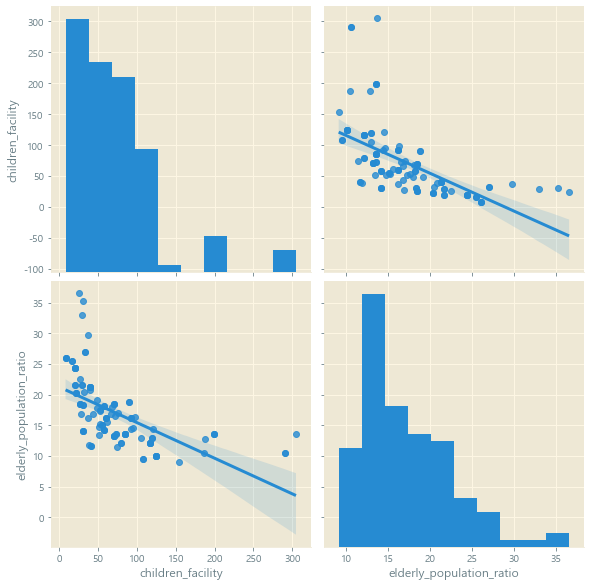

In [50]:
cor1 = data.loc[:,['children_facility','elderly_population_ratio']]
print(cor1.corr())
sns.pairplot(cor1, kind='reg', height=4)

조부모가 아이를 돌봐주는 경우가 많은지 노인비율이 높은 곳일 수록 아이들 시설도 많다.  혹은 주택가가 회사나 도심지보다 노인비율도, 교육시설 비율도 높은 것일 수도 있다.  

## 3. Insight & Feature Engineering
위에서 EDA 와 시각화를 하면서 도출한 인사이트와 피쳐는 다음과 같다.  

>__Features__  
#1 children_facility : 교육시설 갯수  
#2 capital : 수도권, 비수도권을 나누는 범주형 변수  
#3  

## 4. Summary


## final data Dataframe
__data and processed_data__

| 컬럼명 | 내용 | 비고 |
|:--------|:--------|:--------|
| case_id | 감염사례 id | 필요없음 |
| province_x | 행정구역 | 시,도 |
| city | 지방자치구역 | 구,군... |
| group | 집단감염여부 | 집단감염만 있는 데이터임 |
| infection_case | 감염사례 | 감염 경로 |
| latitude_x | 위도 | 제곧내 |
| longtitude_x | 경도 | 제곧내 |
| elementary_shcool_count | 초등학교 수 |  |
| kindergarten_count | 유치원 수 |  |
| university_count | 대학교 수 |  |
| academy_ratio | 학원 비율 | 뭐가 100인지 모름 |
| elderly_population_ratio | 노인인구 비율 |  |
| elderly_alone_ratio | 독거노인 비율 |  |
| nursing_home_count | 요양원 수 |  |
